# Homework: Python Basics

## Team Name: Astro #2

## Team Members:

## Instructions and initial task:

The purpose of this assignment is to find the characteristic index of the turbulence energy cascade of a snapshot taken from a subsonic turbulence simulation. The spectrum scales, so for simplicity we will work in code units.

You should upload the following simulation file (turbulence_sub_hr.vtk) to your Drive:

https://github.com/ciencialatitud0/EPIC_2/tree/main/Day1/Basics-2/homework/homework_data

**Please work with your team mates and produce a single python notebook per group.** When you finish, ask one of the group members to place the notebook onto the EPIC 2 github repository (we recommend to fork the repository, add the notebook to the Day1/Basics-2/homework/ in your account, and then do a pull request).

To get you started I have added a few lines to open the VTK simulation file and make a plot. First, you should reproduce this on Google Colab.

### Reference: 

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2d_python_II_CFDdata.ipynb

In [3]:
# First let's mount our Drive folder:

from google.colab import drive
drive.mount('/content/drive')

# To display the contents

!ls "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Andres y Wendy '   Facebook	    Notebooks
'Colab Notebooks'   IMG_3674.jpeg   Screenshot_20200809_175755.jpg
 College	    IMG_3683.jpeg   Special


In [85]:
# Import useful libraries

import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

In [9]:
# Indicate the working directory

input_directory="/content/drive/My Drive/Colab Notebooks/Data/"
file_name = "turbulence_sub_hr.vtk"

In [10]:
# Read the mesh

mesh = pv.read(input_directory+file_name)

print(mesh)

RectilinearGrid (0x7f7e268a7440)
  N Cells:	40000
  N Points:	40401
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	201, 201, 1
  N Arrays:	5



In [11]:
# Now, we read all the scalar and vector quantities

rho = pv.get_array(mesh, "rho", preference = 'cell') # density in code units
vx1 = pv.get_array(mesh, "vx1", preference = 'cell') # x velocity component in code units
vx2 = pv.get_array(mesh, "vx2", preference = 'cell') # y velocity component in code units
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell') # x magnetic field component in code units
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell') # y magnetic field component in code units

In [12]:
# The above arrays are 1D, so we need to make them 2D
# To check you can run: print(rho.shape)

rho_2D = rho.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx1_2D = vx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_2D = vx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx1_2D = Bx1.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_2D = Bx2.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

In [13]:
# Create a 2D grid using metadata information

x = np.linspace(mesh.bounds[0], mesh.bounds[1], mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2], mesh.bounds[3], mesh.dimensions[1] - 1)

X, Y = np.meshgrid(x, y)

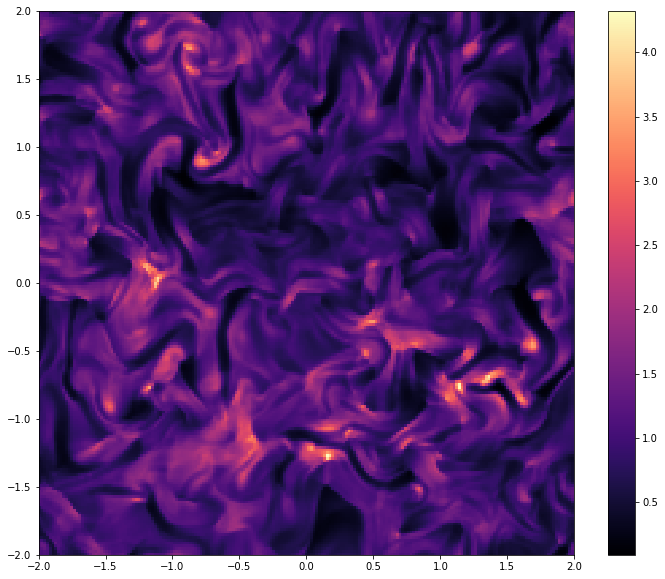

In [14]:
# And we are ready to interpolate our data onto the mesh:

plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, rho_2D, cmap = 'magma')

plt.colorbar(Z)

plt.show()

# TASK 1:

Calculate the kinetic energy density and make a 2D map of it. Recall that:

$E_k =\frac{1}{2}\rho\,v^2$,

so you need to calculate the velocity modulus first:

$v=\sqrt{v_x^2+v_y^2}$.

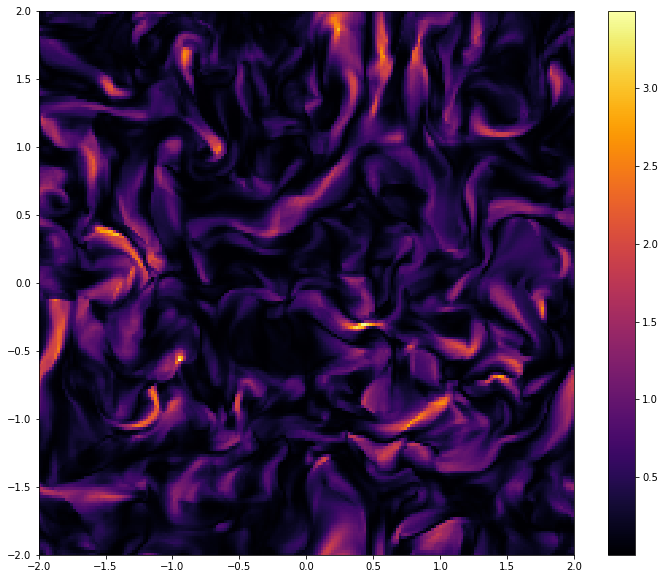

In [15]:
veloc=np.sqrt(vx1_2D**(2)+vx2_2D**(2))
kin=0.5*(rho_2D)*(veloc)**2

plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, kin, cmap = 'inferno')

plt.colorbar(Z)

plt.show()

# TASK 2: 

Carry out the 2D Fast Fourier Transform of the kinetic energy image that you produced above, and make a map of it.


### Reference:
https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2b_fourier_transforms.ipynb

(200, 200)


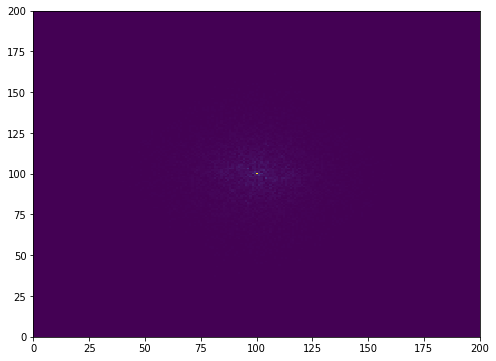

In [72]:
#Fourier
fourier_kin = np.fft.fft2(kin)

#Shift
sfourier_kin = np.fft.fftshift(fourier_kin)
normsfourier_kin = np.abs(sfourier_kin)

print(sfourier_kin.shape)

plt.figure(figsize = (8,6))
Imag=plt.pcolor(normsfourier_kin)


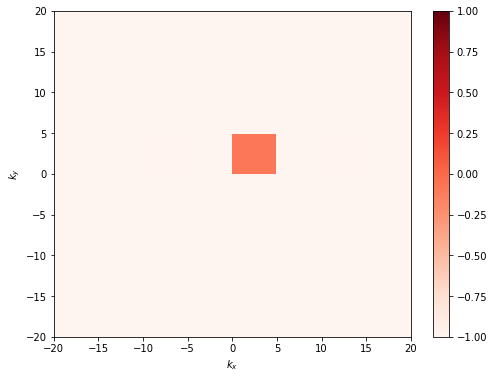

In [77]:
space=0.001
freqs_x = np.fft.fftfreq(kin.shape[0], d=space)
freqs_y = np.fft.fftfreq(kin.shape[1], d=space)

freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

#2D projectin

plt.figure(figsize = (8,6))

Z1 = plt.pcolor(freqs_X, freqs_Y, np.log10((2/normsfourier_kin.size)*normsfourier_kin), cmap = "Reds", vmin = -1, vmax= 1)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.colorbar(Z1)

plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")

plt.show()



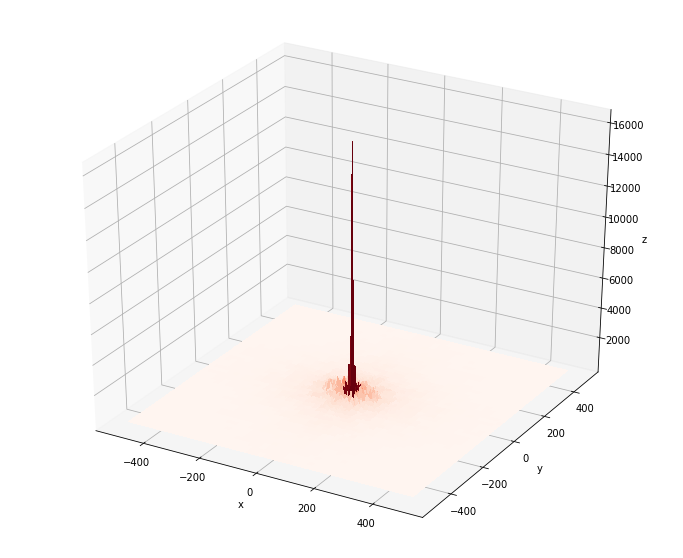

In [78]:
#3d projection

fig = plt.figure(figsize = (8,6))

ax = plt.axes(projection='3d')
surf = ax.plot_surface(freqs_X, freqs_Y, normsfourier_kin, cmap = "Reds", linewidth=0, antialiased=False)

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()



# TASK 3: 

Use the function below to produce a 1D Fourier spectrum from the 2D Fourier image that you produced above. Make a log-log plot of the 1D Fourier spetrum. You should get a plot similar to the sketch shown here (in the "cascade of turbulence" section):

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-2/2c_python_II_lecture.ipynb

### Note:
The GetPSD1D() function calculates the azimuthal summation and will allow you to test whether the spectrum of this turbulence snaphot follows Kolmogorov or not.





In [19]:
from scipy import ndimage

In [20]:
#===================================================================
# Get PSD 1D (total radial power spectrum)
#===================================================================
def GetPSD1D(psd2D):
    h  = psd2D.shape[0]
    w  = psd2D.shape[1]
    wc = w//2
    hc = h//2

    # create an array of integer radial distances from the center
    Y, X = np.ogrid[0:h, 0:w]
    r    = np.hypot(X - wc, Y - hc).astype(np.int)


    # SUM all psd2D pixels with label 'r' for 0<=r<=wc
    # NOTE: this will miss power contributions in 'corners' r>wc
    psd1D = ndimage.sum(psd2D, r, index=np.arange(0, wc))

    return psd1D
#===================================================================

# Taken from: https://medium.com/tangibit-studios/2d-spectrum-characterization-e288f255cc59

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, '$\\log_{10}\\,PSD1D$')

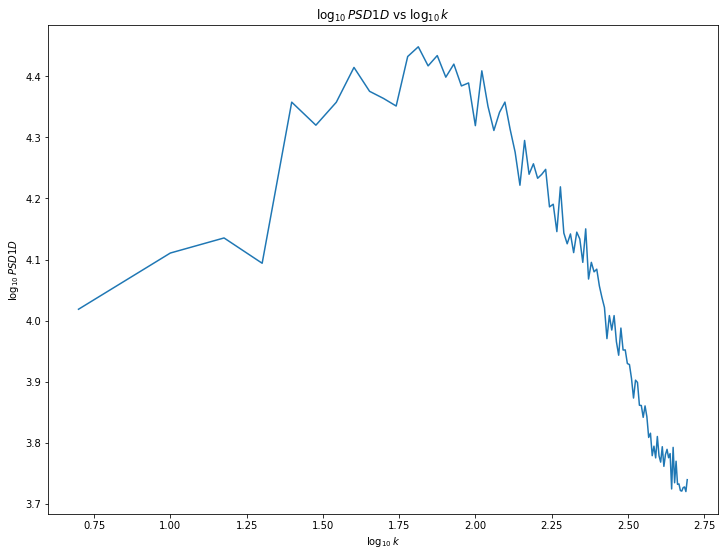

In [101]:
#@title Default title text
import math

#Value of E(k)
energ = GetPSD1D(normsfourier_kin)

#Values of k

space=0.001
freqs_x = np.fft.fftfreq(kin.shape[0], d=space)
for i in range(100):
  freqs_x=np.delete(freqs_x, -1)


wavenumbers =freqs_x

fig,ax=plt.subplots(1,1, figsize=(12, 9))
plt.plot(np.log10(wavenumbers),np.log10(energ))
plt.title(r'$\log_{10}\,PSD1D $ vs $\log_{10}\,k$')
plt.xlabel(r'$\log_{10}\,k$')
plt.ylabel(r'$\log_{10}\,PSD1D$')

# TASK 4: 

Now that you have produced the 1D Fourier spectrum of the kinetic energy, label the plot identifying the turbulence generation, transfer, and dissipation regions. Finally, carry out a linear regression considering only the points associated with the inertial range. Does the spectrum follow Kolmogorov spectrum, $E_k \propto k^{-\frac{5}{3}}$?

### Reference:

https://github.com/ciencialatitud0/EPIC_2/blob/main/Day1/Basics-1/Sesion_1_Data_analysis_with_PythonI.ipynb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, '$\\log_{10}\\,PSD1D$')

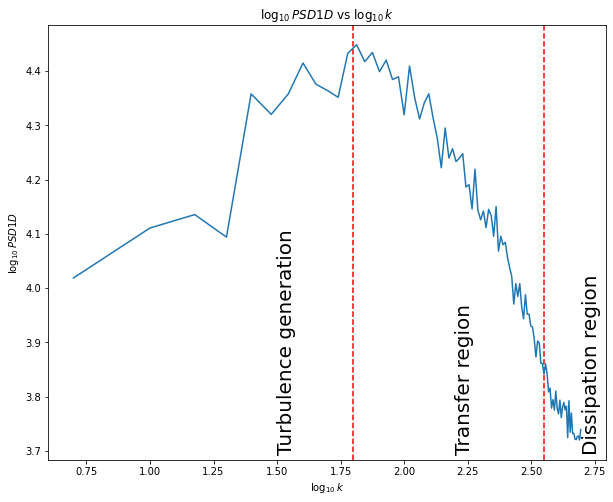

In [153]:
plt.figure(figsize=(10,8))

plt.text(1.5, 3.7, "Turbulence generation", fontsize=20,rotation=90)
plt.text(2.2, 3.7, "Transfer region", fontsize=20,rotation=90)
plt.text(2.7, 3.7, "Dissipation region", fontsize=20,rotation=90)

plt.axvline(x=1.8,linestyle='dashed',color="r")
plt.axvline(x=2.55,linestyle='dashed',color="r")

plt.plot(np.log10(wavenumbers),np.log10(energ))
plt.title(r'$\log_{10}\,PSD1D $ vs $\log_{10}\,k$')
plt.xlabel(r'$\log_{10}\,k$')
plt.ylabel(r'$\log_{10}\,PSD1D$')

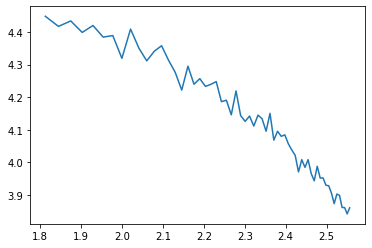

In [121]:
#Gettting the inertial range

transr=np.array(energ)
wave=np.array(wavenumbers)
for i in range(13):
  transr=np.delete(transr, 0)
  wave=np.delete(wave, 0)
for i in range(27):
  transr=np.delete(transr, -1)
  wave=np.delete(wave, -1)


plt.plot(np.log10(wave),np.log10(transr))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


(3.65, 4.6)

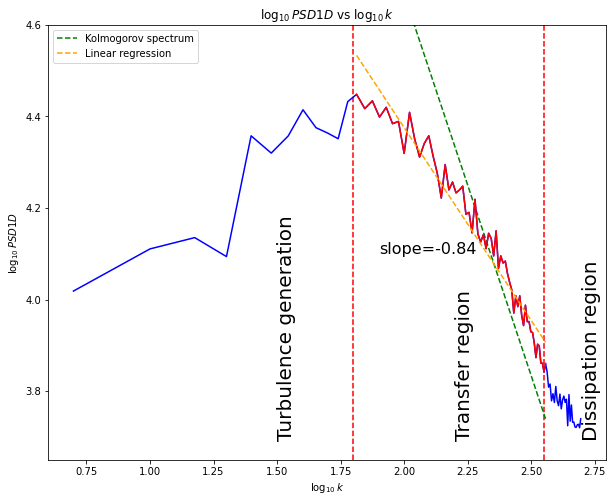

In [154]:
#Linear regression
a_0, a_1 = np.polyfit(np.log10(wave),np.log10(transr), 1)

#kolmo
kolmo=-5/3


#Plotting part
plt.figure(figsize=(10,8))
plt.text(1.5, 3.7, "Turbulence generation", fontsize=20,rotation=90)
plt.text(2.2, 3.7, "Transfer region", fontsize=20,rotation=90)
plt.text(2.7, 3.7, "Dissipation region", fontsize=20,rotation=90)
plt.text(1.9, 4.1, "slope="+str(round(a_0,2)), fontsize=16,rotation=0)


plt.axvline(x=1.8,linestyle='dashed',color="r")
plt.axvline(x=2.55,linestyle='dashed',color="r")


plt.plot(np.log10(wave), kolmo*(np.array(np.log10(wave)))+8,linestyle='dashed',color="g",label='Kolmogorov spectrum')
plt.plot(np.log10(wavenumbers),np.log10(energ),color="b")
plt.plot(np.log10(wave),np.log10(transr),color="r")
plt.plot(np.log10(wave), a_0*(np.array(np.log10(wave)))+ a_1,linestyle='dashed',color="orange", label='Linear regression')
plt.legend()
plt.title(r'$\log_{10}\,PSD1D $ vs $\log_{10}\,k$')
plt.xlabel(r'$\log_{10}\,k$')
plt.ylabel(r'$\log_{10}\,PSD1D$')
plt.ylim(3.65,4.6)

Does the spectrum follow Kolmogorov spectrum,  Ek∝k−53 ?

The spectrum doesn't follow Kolmogorov spectrum 